# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Jayachandra Jarajapu

ID: 1001964536 

NetID: JxJ4536



## Rules

1. Work is to be done
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files . 

The target variable for the clustering dataset is column "class" which should be(<=50 k and >50k).

The target variable for the college dataset is column "Grad.Rate" which should be (<=50k and >50k )




You need to submit this .ipynb file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [3]:
# Import required Python packages here
#Seaborn,numpy,pandas,sklearn,matplotlib only
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#reading the dataset into dataframe
df_data=pd.read_csv("clusteringdata.csv") 
#printing top 5 values
df_data.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:

#to convert the data in the dataset from string to float we use labelencoder function for all the attributes in the dataframe
from sklearn.preprocessing import LabelEncoder 
conv = LabelEncoder()  
Age = conv.fit_transform(df_data.Age)
df_data["Age"]=Age
WorkClass= conv.fit_transform(df_data.WorkClass)
df_data["WorkClass"]=WorkClass
Fnlwght= conv.fit_transform(df_data.Fnlwght)
df_data["Fnlwght"]=Fnlwght
Education= conv.fit_transform(df_data.Education)
df_data["Education"]=Education
EducationNumber= conv.fit_transform(df_data.EducationNumber)
df_data["EducationNumber"]=EducationNumber
MaritalStatus= conv.fit_transform(df_data.MaritalStatus)
df_data["MaritalStatus"]=MaritalStatus
Occupation= conv.fit_transform(df_data.Occupation)
df_data["Occupation"]=Occupation
Relationship= conv.fit_transform(df_data.Relationship)
df_data["Relationship"]=Relationship
Race= conv.fit_transform(df_data.Race)
df_data["Race"]=Race
Sex= conv.fit_transform(df_data.Sex)
df_data["Sex"]=Sex
CapitalGain= conv.fit_transform(df_data.CapitalGain)
df_data["CapitalGain"]=CapitalGain
CapitalLoss= conv.fit_transform(df_data.CapitalLoss)
df_data["CapitalLoss"]=CapitalLoss
HoursPerWeek= conv.fit_transform(df_data.HoursPerWeek)
df_data["HoursPerWeek"]=HoursPerWeek
NativeCountry= conv.fit_transform(df_data.NativeCountry)
df_data["NativeCountry"]=NativeCountry
Class= conv.fit_transform(df_data.Class)
df_data["Class"]=Class

In [5]:
df_data.describe()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.59240,2.983400,2286.490200,10.291800,9.079600,2.625800,6.536000,1.459800,3.656200,0.67420,4.464200,1.571800,37.531600,34.675600,0.244200
std,13.56669,1.213185,1319.174741,3.885315,2.534906,1.514012,4.281492,1.611863,0.857291,0.46872,16.066398,7.282819,11.084709,7.726442,0.429655
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.00000,3.000000,1155.750000,9.000000,8.000000,2.000000,3.000000,0.000000,4.000000,0.00000,0.000000,0.000000,37.000000,37.000000,0.000000
50%,20.00000,3.000000,2278.500000,11.000000,9.000000,2.000000,7.000000,1.000000,4.000000,1.00000,0.000000,0.000000,37.000000,37.000000,0.000000
75%,30.00000,3.000000,3422.250000,12.000000,11.000000,4.000000,10.000000,3.000000,4.000000,1.00000,0.000000,0.000000,42.000000,37.000000,0.000000
max,68.00000,7.000000,4602.000000,15.000000,15.000000,6.000000,14.000000,5.000000,4.000000,1.00000,82.000000,54.000000,73.000000,39.000000,1.000000


In [6]:
df_data.head(5)

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,22,6,576,9,12,4,1,1,4,1,16,0,37,37,0
1,33,5,633,9,12,2,4,0,4,1,0,0,12,37,0
2,21,3,3093,11,8,0,6,1,4,1,0,0,37,37,0
3,36,3,3332,1,6,2,6,0,2,1,0,0,37,37,0
4,11,3,4145,9,12,2,10,5,2,0,0,0,37,5,0


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

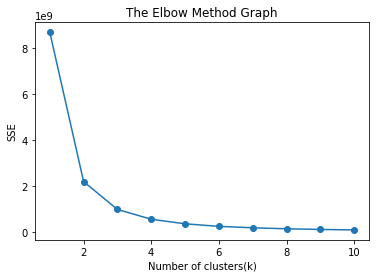

The optimal k value is-> k = 2 


In [7]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a
SSE = list()                #list that contains the within cluster sum of squares values
n_clusters = range (1,11)   #range of K value

for k in n_clusters:        #loop that fits the K-means algorithm to the data
    kmeans = KMeans(n_clusters=k, max_iter=100,  init ='k-means++', n_init=10,random_state=2022 )
    kmeans.fit(df_data)
    SSE.append(kmeans.inertia_)
    
#plotting a line chart of the SSE for each value of k
plt.plot(n_clusters,SSE, marker='o')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('SSE')
plt.show()

print("The optimal k value is-> k = 2 ")

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



In [8]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!
train_size=0.7
# splitting the target variable Potability and copying to a new variable
X = df_data.drop(columns = ['Class']).copy()
Y = df_data['Class']

# In the first step we will split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7)
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)
print("----------------------------------------")

from sklearn.preprocessing import normalize

preproc_data = normalize(df_data, norm='l2', axis=1)    #normalizing the dataset
kmeans = KMeans(n_clusters=2).fit(preproc_data)
cluster_labels = kmeans.labels_
classes = df_data["Class"]
print("Accuracy is", accuracy_score(list(classes), list(cluster_labels)))
###################end code for Task 1-b-1

(3500, 14)
(3500,)
(1500, 14)
(1500,)
----------------------------------------
Accuracy is 0.7422


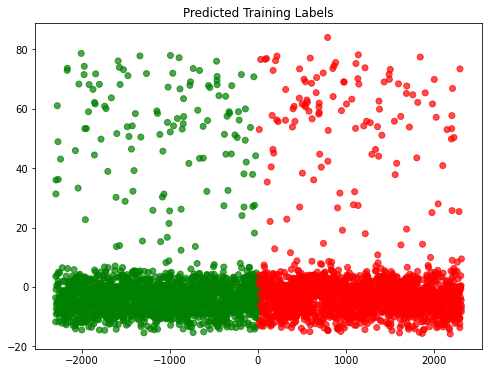

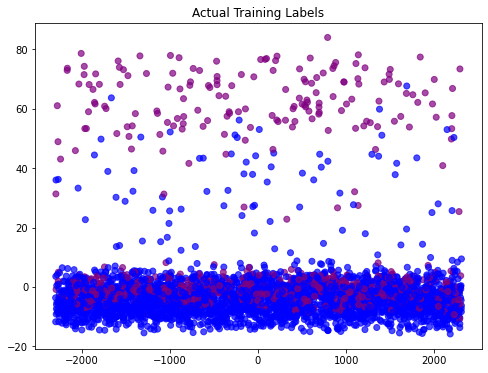

In [9]:

###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels

# Import PCA
from sklearn.decomposition import PCA


# Create the KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

# Compute cluster centers and predict cluster index for each sample 
cindex = kmeans.predict(X_train)


# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

colors1 = ['red','green']               #using different colors for plotting the visualization
colors2 = ['blue','yellow', 'purple']   #using different colors for plotting the visualization

plt.figure('Two Cluster K-Means visualization for training labels', figsize = (8,6))
plt.title('Predicted Training Labels')
plt.scatter(x,y, c=cindex, alpha=0.7,label= cindex, cmap=matplotlib.colors.ListedColormap(colors1))
plt.show()

plt.figure('Two Cluster K-Means visualization for training labels', figsize = (8,6))
plt.title('Actual Training Labels')
plt.scatter(x,y, c= y_train, alpha=0.7, label= y_train, cmap=matplotlib.colors.ListedColormap(colors2) )
plt.show()
###################end code for Task 1-b-2


Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

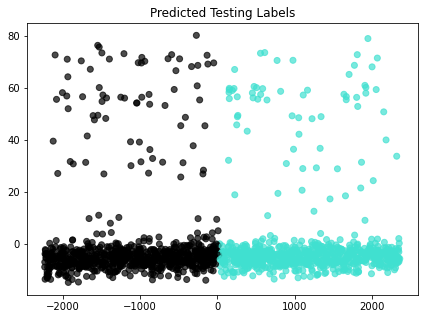

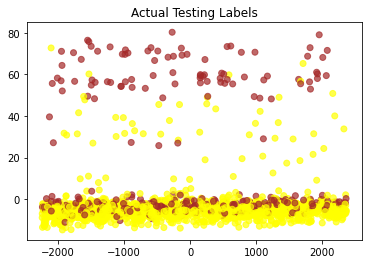

In [10]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels


# predict cluster index for each sample 
# Import PCA
from sklearn.decomposition import PCA
# Create the KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_test)
# Compute cluster centers and predict cluster index for each sample 
cindex2 = kmeans.predict(X_test)

# Model and fit the data to the PCA model
X_test_pca = PCA(n_components=2).fit_transform(X_test)

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)
x = X_test_pca[:, 0]
y = X_test_pca[:, 1]

colors1 = ['black','turquoise']   #using different colors for plotting the visualization
colors2 = ['yellow','brown']      #using different colors for plotting the visualization

plt.figure('Two Cluster K-Means visualization for testing labels', figsize = (7,5))
plt.title('Predicted Testing Labels')
plt.scatter(x,y, c=cindex2, alpha=0.7,label= cindex2, cmap=matplotlib.colors.ListedColormap(colors1))
plt.show()
plt.title('Actual Testing Labels')
plt.scatter(x,y, c= y_test, alpha=0.7,label= y_test, cmap=matplotlib.colors.ListedColormap(colors2))
plt.show()
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

In [11]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix   #importing confusion matrix package

print(confusion_matrix(y_train,cindex));     #confusion matrix for the training variables

print(confusion_matrix(y_test,cindex2));    #confusion matrix for the testing target dataset


###################end code for Task 1-b-4

[[1297 1358]
 [ 449  396]]
[[566 558]
 [202 174]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [12]:
###################begin code for Task 2-a: Print out a confusion matrix
# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score


## Calculate pairwise distance matrix for X_train
pdm_train = X_train

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + cosine
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
clc = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
ypred_clc = clc.fit_predict(cosine_distance)
f1_score_clc = f1_score(y_train, ypred_clc, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + euclidean
euclidean_distance = pairwise_distances(pdm_train, metric='euclidean')
cle = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
ypred_cle = cle.fit_predict(euclidean_distance)
f1_score_cle = f1_score(y_train, ypred_cle, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Model and fit the training data to the AgglomerativeClustering model
## complete linkage + manhattan
manhattan_distance = pairwise_distances(pdm_train, metric='manhattan')
clm = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
ypred_clm = clm.fit_predict(manhattan_distance)
f1_score_clm = f1_score(y_train, ypred_clm, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + cosine
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
alc = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_alc = alc.fit_predict(cosine_distance)
f1_score_alc = f1_score(y_train, ypred_alc, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + euclidean
euclidean_distance = pairwise_distances(pdm_train, metric='euclidean')
ale = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_ale = ale.fit_predict(euclidean_distance)
f1_score_ale = f1_score(y_train, ypred_ale, labels=None, pos_label=1, average='weighted', sample_weight=None)


## Model and fit the training data to the AgglomerativeClustering model
## average linkage + manhattan
manhattan_distance = pairwise_distances(pdm_train, metric='manhattan')
alm = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_alm = alm.fit_predict(manhattan_distance)
f1_score_alm = f1_score(y_train, ypred_alm, labels=None, pos_label=1, average='weighted', sample_weight=None)

print("F1-score for complete linkage + cosine", f1_score_clc)
print("F1-score for complete linkage + euclidean", f1_score_cle)
print("F1-score for complete linkage + manhattan", f1_score_clm)
print("F1-score for average linkage + cosine", f1_score_alc)
print("F1-score for average linkage + euclidean", f1_score_ale)
print("F1-score for average linkage + manhattan", f1_score_alm)
###################end code for Task 2-a

F1-score for complete linkage + cosine 0.1132351714377334
F1-score for complete linkage + euclidean 0.5627688152585494
F1-score for complete linkage + manhattan 0.5679794303401208
F1-score for average linkage + cosine 0.6578402939133352
F1-score for average linkage + euclidean 0.6023652488687783
F1-score for average linkage + manhattan 0.6122618199864726


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

The best model is ypred_alc


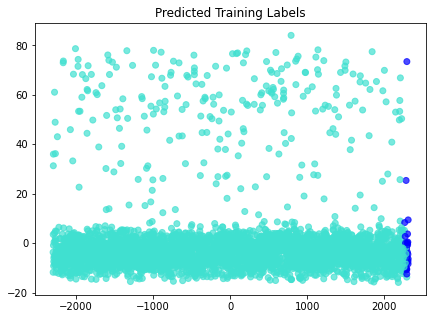

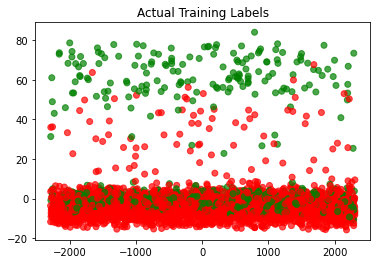

In [13]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels


# Visualize the predicted training labels versus actual training labels. 
all_models = {'ypred_clc':f1_score_clc,'ypred_cle':f1_score_cle,'ypred_clm':f1_score_clm,'ypred_alc':f1_score_alc,'ypred_ale':f1_score_ale,'ypred_alm':f1_score_alm}
best_model_value = max(all_models,key=all_models.get)

if best_model_value == 'ypred_clc':
    best_model = ypred_clc

elif best_model_value == 'ypred_cle':
    best_model = ypred_cle

elif best_model_value == 'ypred_clm':
    best_model = ypred_clm

elif best_model_value == 'ypred_alc':
    best_model = ypred_alc

elif best_model_value == 'ypred_ale':
    best_model = ypred_ale

elif best_model_value == 'ypred_alm':
    best_model = ypred_alm

else:
    best_model = None
    
print("The best model is", best_model_value)

### using the best model for visualizing the predicted & actual training samples 

from sklearn.decomposition import PCA    # Import PCA

kmeans = KMeans(n_clusters=2)            # Create the KMeans model
kmeans.fit(X_train)

                ####using PCA model used in task 1-b-2###
    
# Compute cluster centers and predict cluster index for each sample 
cindex = kmeans.predict(X_train)              

# Model and fit the data to the PCA model
X_train_pca = PCA(n_components=2).fit_transform(X_train)

               ####using PCA model used in task 1-b-2###
    
# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)
x = X_train_pca[:, 0]
y = X_train_pca[:, 1]

colors1 = ['turquoise','blue']   #using different colors for plotting the visualization
colors2 = ['red','green']        #using different colors for plotting the visualization

plt.figure('Two Cluster K-Means best model visualization for training labels', figsize = (7,5))
plt.title('Predicted Training Labels')
plt.scatter(x,y, c=best_model, alpha=0.7,label= best_model, cmap=matplotlib.colors.ListedColormap(colors1))
plt.show()
plt.title('Actual Training Labels')
plt.scatter(x,y, c= y_train, alpha=0.7,label= y_train, cmap=matplotlib.colors.ListedColormap(colors2))
plt.show()

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

The best model is ypred_alc


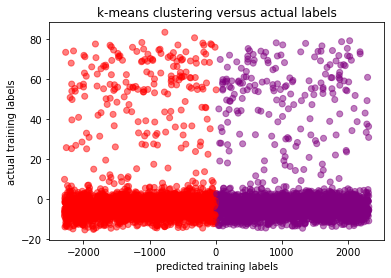

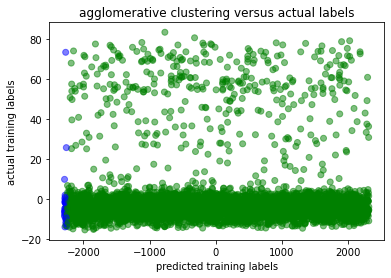

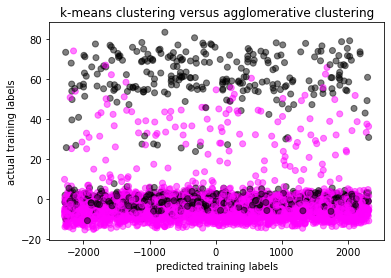

In [14]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels
X = df_data;  
Y = df_data.iloc[:, 14];   

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)
kmeans = KMeans(n_clusters=2)
Kmeans_fit = kmeans.fit_predict(X)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pdm_train = X
cosine_distance = pairwise_distances(pdm_train, metric='cosine')
euclidean_distance = pairwise_distances(pdm_train, metric='euclidean')
manhattan_distance = pairwise_distances(pdm_train, metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
## complete linkage + cosine
clc = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
ypred_clc = clc.fit_predict(cosine_distance)
f1_score_clc = f1_score(Y, ypred_clc, labels=None, pos_label=1, average='weighted', sample_weight=None)

## complete linkage + euclidean
cle = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
ypred_cle = cle.fit_predict(euclidean_distance)
f1_score_cle = f1_score(Y, ypred_cle, labels=None, pos_label=1, average='weighted', sample_weight=None)

## complete linkage + manhattan
clm = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='complete')
ypred_clm = clm.fit_predict(manhattan_distance)
f1_score_clm = f1_score(Y, ypred_clm, labels=None, pos_label=1, average='weighted', sample_weight=None)

## average linkage + cosine
alc = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_alc = alc.fit_predict(cosine_distance)
f1_score_alc = f1_score(Y, ypred_alc, labels=None, pos_label=1, average='weighted', sample_weight=None)

## average linkage + euclidean
ale = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_ale = ale.fit_predict(euclidean_distance)
f1_score_ale = f1_score(Y, ypred_ale, labels=None, pos_label=1, average='weighted', sample_weight=None)

## average linkage + manhattan
alm = AgglomerativeClustering(n_clusters=2, affinity='precomputed', linkage='average')
ypred_alm = alm.fit_predict(manhattan_distance)
f1_score_alm = f1_score(Y, ypred_alm, labels=None, pos_label=1, average='weighted', sample_weight=None)

## Finding the best performed model all these
all_models = {'ypred_clc':f1_score_clc,'ypred_cle':f1_score_cle,'ypred_clm':f1_score_clm,'ypred_alc':f1_score_alc,'ypred_ale':f1_score_ale,'ypred_alm':f1_score_alm}
best_model_value = max(all_models,key=all_models.get)

if best_model_value == 'ypred_clc':
    best_model = ypred_clc

elif best_model_value == 'ypred_cle':
    best_model = ypred_cle

elif best_model_value == 'ypred_clm':
    best_model = ypred_clm

elif best_model_value == 'ypred_alc':
    best_model = ypred_alc

elif best_model_value == 'ypred_ale':
    best_model = ypred_ale

elif best_model_value == 'ypred_alm':
    best_model = ypred_alm

else:
    best_model = None
    
print("The best model is", best_model_value)


### Visualize Clusters
#  Model and fit the data to the PCA model
X_pca = PCA(n_components=2).fit_transform(X)
x = X_pca[:,0]
y = X_pca[:,1]


# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 
colors1 = ['red','green','blue','purple']   #using different colors in plotting the visualization
colors2 = ['green','red','blue']
colors3 = ['magenta','black']
# plotting the three graphs
plt.scatter(x,y,c= Kmeans_fit, alpha=0.5,label= Kmeans_fit, cmap=matplotlib.colors.ListedColormap(colors1))
plt.title('k-means clustering versus actual labels')
plt.xlabel('predicted training labels')
plt.ylabel('actual training labels')
plt.show()
plt.scatter(x,y,c= best_model, alpha=0.5,label= best_model, cmap=matplotlib.colors.ListedColormap(colors2))
plt.title('agglomerative clustering versus actual labels')
plt.xlabel('predicted training labels')
plt.ylabel('actual training labels')
plt.show()
plt.scatter(x,y,c= Y, alpha=0.5, label= Y, cmap=matplotlib.colors.ListedColormap(colors3))
plt.title('k-means clustering versus agglomerative clustering')
plt.xlabel('predicted training labels')
plt.ylabel('actual training labels')

plt.show()
###################end code for Task 3-a

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [15]:
###################begin code for Task 3-b
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#printing confusion matrix of Kmeans and agglomerative clustering
X = df_data;  
Y = df_data.iloc[:, 14];   

kmeans = KMeans(n_clusters=2)
Kmeans_fit = kmeans.fit_predict(X)
#printing confusion matrix after checking kmeans
print("Confusion Matrix of Kmeans\n", cm(Y,Kmeans_fit));
print("Confusion Matrix of Agglomerative Clustering\n", cm(Y,best_model));

print("-------------------------------------")

#comparing precision
precision_K = precision_score(Y, Kmeans_fit, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Precision of Kmeans\n ", precision_K)
precision_A = precision_score(Y, best_model, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Precision of Agglomerative Clustering\n ", precision_A)

print("-------------------------------------")

#comparing recall
recall_K = recall_score(Y, Kmeans_fit, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Recall of Kmeans\n ", recall_K)
recall_A = recall_score(Y, best_model, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("Recall of Agglomerative Clustering\n ", recall_A)

print("-------------------------------------")

#comparing F1-score
F1score_K = f1_score(Y, Kmeans_fit, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("F1-score of Kmeans\n ", F1score_K)
F1score_A = f1_score(Y, best_model, labels=None, pos_label=1, average='weighted', sample_weight=None)
print("F1-score of Agglomerative Clustering\n ", F1score_A)


###################end code for Task 3-b

Confusion Matrix of Kmeans
 [[1912 1867]
 [ 571  650]]
Confusion Matrix of Agglomerative Clustering
 [[3750   29]
 [1209   12]]
-------------------------------------
Precision of Kmeans
  0.64505656552759
Precision of Agglomerative Clustering
  0.6430097708526995
-------------------------------------
Recall of Kmeans
  0.5124
Recall of Agglomerative Clustering
  0.7524
-------------------------------------
F1-score of Kmeans
  0.5464702792404234
F1-score of Agglomerative Clustering
  0.6533622992129754


## Reasoning:


From the above obtained values After comparing the factors like precision, recall, and F1-score for both the models based on the accuracy value we would choose the Agglomerative clustering model

In [16]:
from sklearn.metrics import accuracy_score
#taking the whole dataset
X = df_data;  
Y = df_data.iloc[:, 14]; 

#calculating accuracy score with accuracy_score for kmeans
accuracyK = accuracy_score(Y, Kmeans_fit)
print("Accuracy of Kmeans\n ", accuracyK)
#calculating accuracy score with accuracy_score for Agglomerative clustering
accuracyA = accuracy_score(Y, best_model)
print("Accuracy of Agglomerative clustering\n ", accuracyA)

Accuracy of Kmeans
  0.5124
Accuracy of Agglomerative clustering
  0.7524


## Reasoning:


Based on the accuracy values, we would prefer 'Agglomerative Clustering' clustering model over K-means as Agglomerative Clustering model's accuracy is better than that of the K-means Clustering

## Reference

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- https://www.w3schools.com/python/python_lists.asp

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining the assignment and it's implementation.
    


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points